# Time Series Analysis
In this lab you will run a simple time series analysis for the concentration of CO<sub>2</sub> in Earth's atmosphere recorded at the [Mauna Loa Observatory](https://www.esrl.noaa.gov/gmd/obop/mlo/) on Hawaii (run by the National Oceanic and Atmospheric Administration in the USA). The analysis has been written for you in the Python computer programming language, but **you don't need any prior knowledge of computer programming**. The aims of this lab are:
* Understand what a time series is
* Familiarise yourself with important concepts in time series analysis
* Examine the changing CO<sub>2</sub> concentrations in the Earth's atmosphere through time
* Get an introduction to the use of progamming languages such as Python for performing data analysis

### Python
The programming language we are using in this lab is called Python.  No prior knowledge of programming is required for this lab. **Learning how to be a programmer is not the aim!** However, this sort of scientific computing is becoming more common place in research and consultancy, so it won't do you any harm to see it in action. Python is a multifunctional computer language, for example it can interface with ArcGIS and QGIS (the software used in the previous lab) to automate workflows.

The code for this lab has all been written for you in this notebook, you just need to execute it. 
**To run a code block, click in a cell, hold down shift, and press enter.** 
An asterisk in square brackets `In [*]:` will appear while the code is being executed, and this will change to a number `In [1]:` when the code is finished. *The order in which you execute the code blocks matters, they must be run in sequence.* 

Inside blocks of python code there are comments indicated by lines that start with `#`. These lines are not computer code but rather comments providing information about what the code is doing to help you follow along. Before we get started we need to tell python which tools we want to use (these are called modules):

In [1]:
# import modules for numerical and statistical calculations and for plotting data
import urllib
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

# tell python to allow plotting to occur within the page
%matplotlib inline

### Access timeseries data
The time series data of mean monthly CO<sub>2</sub> concentrations recorded at Mauna Loa can be access [here](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html). However, by providing a direct link to the data stored online, we can just open it directly in python:

**N.B. The direct link to the Mauna Loa observatory seems to be blocked on student accounts and therefore the data file has been provided on Moodle. PLEASE DOWNLOAD THE DATA FROM MOODLE** 

In [3]:
# download the Mauna Loa CO2 data, we are only going to use two columns, 
# the decimal date and the monthly average CO2 concentrations,
# so we unpack the results into two variables, date and Co2 concentration

# load the data from the file
Filename = "co2_mm_mlo.txt"
DecimalDate, CO2 = np.loadtxt(Filename, usecols=(2,4), unpack=True)

# let's print the first five values of each to get an idea what the data looks like
print(DecimalDate[0:5])
print(CO2[0:5])


[1958.208 1958.292 1958.375 1958.458 1958.542]
[315.71 317.45 317.5  317.1  315.86]


### Plot time series of mean monthly CO<sub>2</sub>

First thing we might like to do is just to plot the data and see what it looks like. This is likely a plot you have seen before in climate change lectures and in media articles about climate change. This plot is known as the "Keeling Curve" after geochemist Charles David Keeling, who designed and built the Mauna Loa CO<sub>2</sub> monitoring station in 1957 ([Harris, 2010](https://pubs.acs.org/doi/abs/10.1021/ac1001492)).

Note that we need to consider the units we are working in. Time is in years and CO<sub>2</sub> concentration is in parts per million (ppm).

So let's make the plot by creating a figure, plotting the data, adding a legend and labelling our axes:

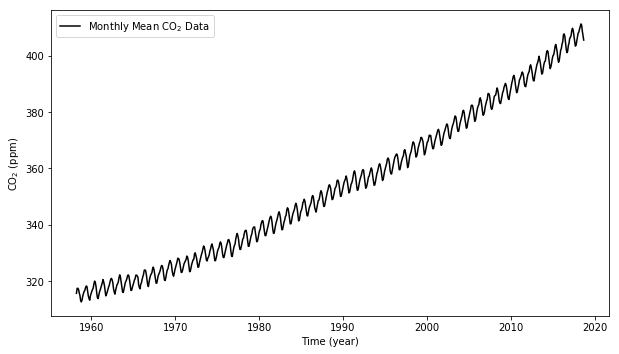

In [4]:
# plot the time series
FigWidth = 10.
fig1 = plt.figure(1,figsize=(FigWidth,FigWidth*9./16.))
ax1 = fig1.add_subplot(111)
ax1.plot(DecimalDate,CO2,'k-',label="Monthly Mean CO$_2$ Data")
plt.xlabel("Time (year)")
plt.ylabel("CO$_2$ (ppm)")
# add the legend
ax1.legend()
plt.savefig("MaunaLoa_CO2_TimeSeries.png",dpi=600)

Note that the last line saves the figure as an image file on your computer so you could put it in a report or essay.

## Decomposition

This time series can be thought of as being made up of a number of components, each of which can be analysed in turn to get a full statistical description of how the variable is changing through time. There is an overall **trend** whereby CO<sub>2</sub> concentrations in the atmosphere are increasing through time. There is then some regularity to the fluctuations about this trend, some **seasonality** in the data. These components can each be described individually using mathematical descriptions, and the resulting mathematical model can be used for prediction. 

First let's look at the components in a bit more detail by zooming in on a part of the plot, changing the axis limits:

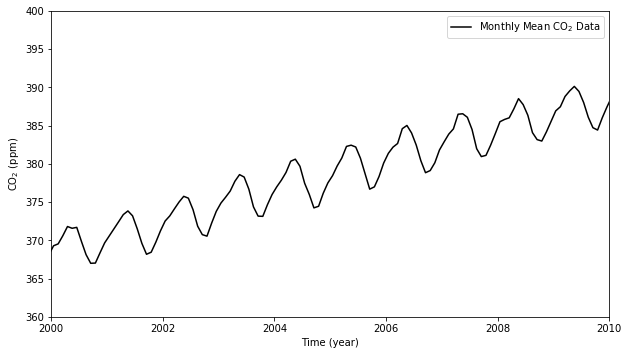

<Figure size 432x288 with 0 Axes>

In [5]:
# change the x and y axis scale to show seasonality
ax1.set_xlim(2000,2010)
ax1.set_ylim(360,400)
plt.savefig("MaunaLoa_CO2_TimeSeries_Seasonal.png",dpi=600)
fig1

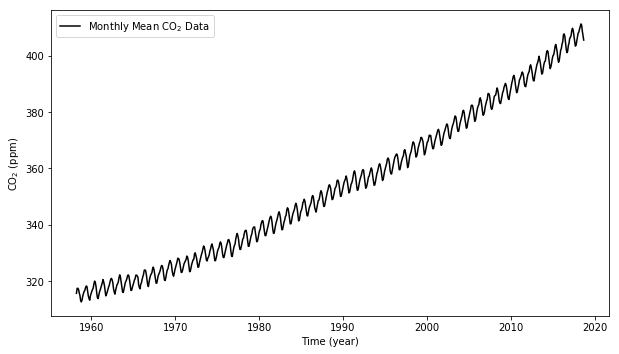

In [6]:
# reset axis scales back to normal
ax1.autoscale()
fig1

### Trend

There is clearly an upward trend in the CO<sub>2</sub> concentrations in the atmosphere through time. The simplest way to analyse this trend would be through performing linear regression analysis between time and CO<sub>2</sub> concentrations, just like you have done using Minitab in previous labs. This can tell us mathetmatically the nature of the trend, plus give us an idea of how much of the variance in CO<sub>2</sub> concentrations can be explained by this trend. Thus we can start with a straight line equation:

$$
\begin{equation}
{Y_t = C_1 + C_2 X_t}
\end{equation}
$$

In this equation $X_t$ is time, and $Y_t$ is CO<sub>2</sub> concentration (the subscript $_t$ has been used to indicate we are considering the **trend** component), $C_1$ and $C_2$ are fitted coefficients corresponding to the intercept and slope of a fitted line respectively.

The statistics packages within python have a linear regression tool we can use, this works in exactly the same way as the linear regression tool you have been using in Minitab. So let's run it and print the results to screen:

In [7]:
# perform linear regression
slope, intercept, r_value, p_value, std_err = stat.linregress(DecimalDate,CO2)

# set p if very low
if (p_value<0.001):
    p_value = 0.001
    
print("C1 = ", intercept)
print("C2 = ", slope)
print("R^2 = ", r_value**2.)
print("p = ", p_value)

C1 =  -2729.136301891357
C2 =  1.5503352282707767
R^2 =  0.9774753352868313
p =  0.001


Now we can plot the results of our regression, label the regression line and add our equation and R$^2$ value:

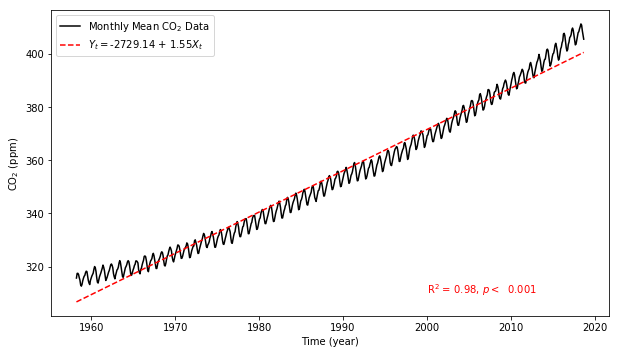

In [8]:
# make a string of the equation so that we can add
eq = "$Y_t=$"+'{0:.2f}'.format(intercept)+" + "+'{0:.2f}'.format(slope)+"$ X_t$"

# plot the result
ax1.plot(DecimalDate, intercept+slope*DecimalDate,'r--',label=eq)

# add R2 and p value
ax1.text(2000,310,"R$^2$ = "+'{0:.2f}'.format(r_value**2.)+", $p <$  "+'{0:.3f}'.format(p_value),color="r")

# add the legend
ax1.legend()

# save output
fig1.savefig("MaunaLoa_CO2_TimeSeries_LinearTrend.png",dpi=600)

#display the updated figure
fig1

Wow, this linear regression can explain 98% of the variance in CO<sub>2</sub> concentrations through time. Not bad! But as with all regression applications we need to take a look at our residuals to see whether our model is consistent.

We can take a look at the residuals between the model fit and the raw data to have an idea of how well our regression model is performing. There are three plots we could work with, a histogram of the residuals, a normal probability plot, and a plot of the residuals vs the modelled values:

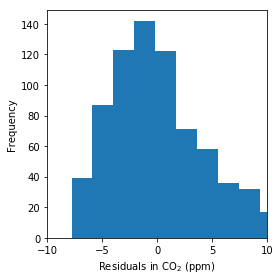

In [9]:
# calculate the residuals
linear_model = intercept+slope*DecimalDate
residuals = CO2-linear_model

# plot the residuals on a new figure
fig2 = plt.figure(2,figsize=(4,4))
ax2 = fig2.add_subplot(111)
ax2.hist(residuals)
plt.xlabel("Residuals in CO$_2$ (ppm)")
plt.ylabel("Frequency")
plt.xlim(-10,10)
plt.tight_layout()
fig2.savefig("MaunaLoa_CO2_TimeSeries_LinearTrend_Residuals_Hist.png", dpi=600)

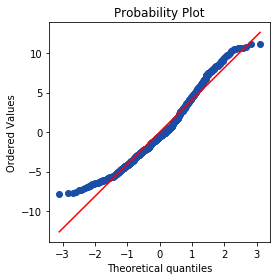

In [10]:
# create another plot for normal probability plot 
fig3 = plt.figure(2,figsize=(4,4))
ax3 = fig3.add_subplot(111)
stat.probplot(residuals,plot=ax3)

# customise the colours
ax3.get_lines()[0].set_marker('o')
ax3.get_lines()[0].set_markerfacecolor([0.1,0.3,0.65])
ax3.get_lines()[0].set_markeredgecolor([0.1,0.3,0.65])
plt.tight_layout()
fig3.savefig("MaunaLoa_CO2_TimeSeries_LinearTrend_ProbPlot.png", dpi=600)

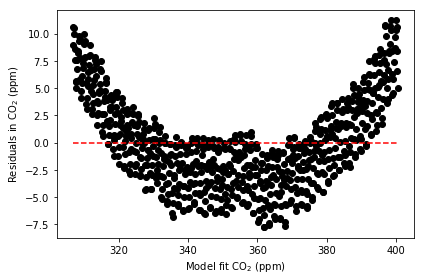

In [11]:
# create a third plot for model vs residuals
fig4 = plt.figure(2,figsize=(6,4))
ax4 = fig4.add_subplot(111)
ax4.plot(linear_model,residuals,'ko')
ax4.plot([linear_model.min(),linear_model.max()],[0,0],'r--')
plt.xlabel("Model fit CO$_2$ (ppm)")
plt.ylabel("Residuals in CO$_2$ (ppm)")
plt.tight_layout()
fig4.savefig("MaunaLoa_CO2_TimeSeries_LinearTrend_Residuals.png", dpi=600)

So our residuals are not normally distributed and there is *clearly* heteroscedasticity. Measured CO2 concentrations are higher than our best fit line towards the beginning and end of the record, and lower in the middle. Instead of transforming any variables (which I can tell you will not work in this case), we can try fitting a non-linear (curvy) model, or more specifically a **quadratic** model with an extra coefficient ($C_3$) of the form:

$$
\begin{equation}
{Y_t = C_1 + C_2 X_t + C_3 {X_t}^2}
\end{equation}
$$

To do this we will use a polynomial regression function, rather than linear regression function. Nmuerical python has a *"polyfit"* tool do this, and we have to tell it that the order of the polynomial is 2 (i.e. X$^2$ is the largest power in the equation):

In [12]:
# try a 2nd order polynomial fit instead
coefs = np.polyfit(DecimalDate,CO2,2)
fit = np.poly1d(coefs)
print("C1 = ",coefs[2])
print("C2 = ",coefs[1])
print("C3 = ",coefs[0])

C1 =  47433.252349098024
C2 =  -48.90711564585234
C3 =  0.01268758064347416


Now annoyingly, this function doesnt explicitly calculate R$^2$ for us. We need to do it ourselves. 
So first let's subtract the model from data to get our residuals:

In [13]:
# calculate the residuals
residuals = CO2-fit(DecimalDate)

The coefficient of determination (R$^2$) is calculated from the total sum of squared differences ($SS_{tot}$) between the observations and the mean. This sum of squares is proporational to the total variance. We also need the sum of squares of our residuals relative to our best fit model ($SS_{res}$):

$$
\begin{equation}
R^2 = 1 - {{SS_{res}}\over{SS_{tot}}}
\end{equation}
$$

In [14]:
# calculate total sum of squares relative to to the mean
SS_tot = np.sum((CO2-np.mean(CO2))**2.)

# calculate total sum of squared residuals
SS_res = np.sum(residuals**2.)

# calculate R2 and print to screen
R_2 = 1-(SS_res/SS_tot)
print("R^2 = ", R_2)

R^2 =  0.9934939125254602


Now we can plot our new model fit on our existing graph and report the equation and $R^2$:

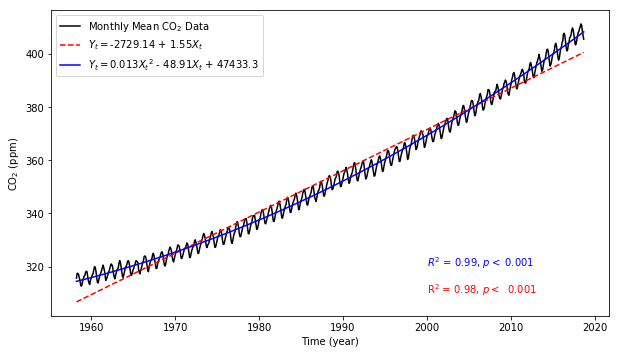

In [15]:
# make a string of the equation
eq2 = "$Y_t=$"+'{0:.3f}'.format(coefs[0])+"${X_t}^2$ - "+'{0:.2f}'.format(-coefs[1])+"$ X_t$ + "+'{0:.1f}'.format(coefs[2])

# plot the result
ax1.plot(DecimalDate, fit(DecimalDate),'b-',label=eq2)            

# do chi_dquared test to check significance of relationship
chi_sq, p_value = stat.chisquare(CO2,fit(DecimalDate))
p_value = 1-p_value

# set p if very low
if (p_value<0.001):
    p_value = 0.001
    
ax1.text(2000,320,"$R^2$ = "+'{0:.2f}'.format(R_2)+", $p <$ "+'{0:.3f}'.format(p_value), color="b")

# add the legend
ax1.legend()

# save figure
fig1.savefig("MaunaLoa_CO2_TimeSeries_QuadraticTrend.png", dpi=600)

fig1

This looks to be doing a much better job of representing the trend in CO<sub>2</sub> concentrations. Let's check the residuals:

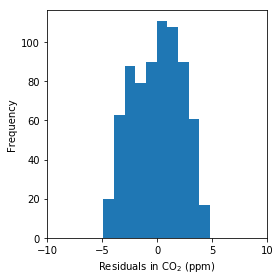

In [16]:
# plot the residuals
fig5 = plt.figure(5,figsize=(4,4))
ax5 = fig5.add_subplot(111)
ax5.hist(residuals)
plt.xlabel("Residuals in CO$_2$ (ppm)")
plt.ylabel("Frequency")
plt.xlim(-10,10)
plt.tight_layout()
fig5.savefig("MaunaLoa_CO2_TimeSeries_QuadTrend_Residuals.png", dpi=600)

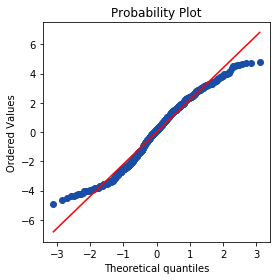

In [17]:
# create a second plot axis for normal probability plot 
fig6 = plt.figure(6,figsize=(4,4))
ax6 = fig6.add_subplot(111)
stat.probplot(residuals,plot=ax6)

# customise the colours
ax6.get_lines()[0].set_marker('o')
ax6.get_lines()[0].set_markerfacecolor([0.1,0.3,0.65])
ax6.get_lines()[0].set_markeredgecolor([0.1,0.3,0.65])
plt.tight_layout()
fig6.savefig("MaunaLoa_CO2_TimeSeries_QuadTrend_ProbPlot.png", dpi=600)

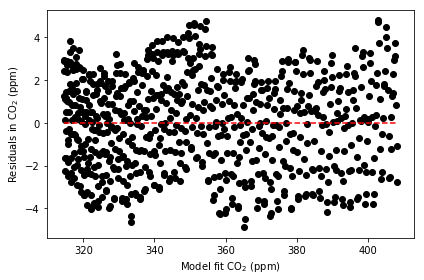

In [18]:
# create a third plot for model vs residuals
Model = fit(DecimalDate)
fig7 = plt.figure(7,figsize=(6,4))
ax7 = fig7.add_subplot(111)
ax7.plot(Model,residuals,'ko')
ax7.plot([Model.min(),Model.max()],[0,0],'r--')
plt.xlabel("Model fit CO$_2$ (ppm)")
plt.ylabel("Residuals in CO$_2$ (ppm)")
plt.tight_layout()
fig7.savefig("MaunaLoa_CO2_TimeSeries_QuadTrend_Resis.png", dpi=600)

OK that looks like an improvement. We could now go on and try higher order polynomial fits or try and fit other types of functions such as power laws or exponential functions, particularly if the quadratic was not able to offer a reasonable fit ot the data.

## Timeseries Filters

An alternative approach to identifying the trend component in a timeseries is to run a filter across the data. A filter acts to smooth out regular and irregular noise and isolate the trend. The advantage of a filter is that it makes no *a priori* assumptions about the nature of the trend (e.g. linear, quadratic, power law). The disadvantage is that the trend is not described mathematically and thus cannot be extrapolated to make future predictions.

The simplest form of filter is a running average (running mean). This means for each data point in our timeseries we take an average $\bar{Y_t}$ of all the nearby values $Y_t$, so the overbar indicates an average value:

$$
\begin{equation}
\bar{Y_t} = {{1}\over{m}}\sum_{j=-k}^{k} Y_t+j
\end{equation}
$$

Where $m$ is the size of the moving window (how many values to calculate the mean from), and $k$ is a index referencing the nearest values to $Y_t$ within the moving window. Below we define a function that calculates the running mean, and use a 24 month (2 year) window size to smooth our data:

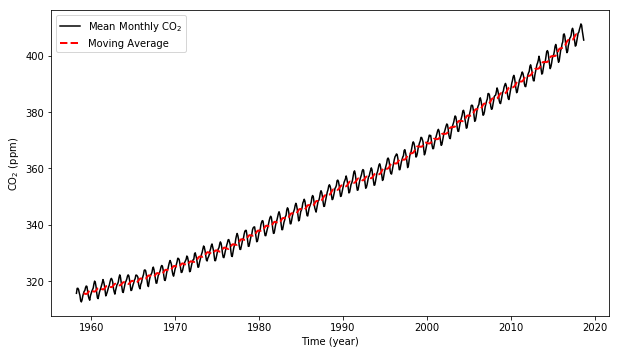

In [22]:
# filter
def running_mean(x,N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# number of timesteps to average over = 24 months/ 2 years
Nt = 20
CO2_filter = running_mean(CO2,Nt)

# set up filtered dates and raw CO2 data
# we need to trim the ends of the filter since we have no computations until we are half a window in to the dataset
DecimalDate_f = DecimalDate[int(Nt/2):-int((Nt/2)-1)]
CO2_f = CO2[int(Nt/2):-int((Nt/2)-1)]

FigWidth = 10.
fig8 = plt.figure(8,figsize=(FigWidth,FigWidth*9./16.))
ax8 = fig8.add_subplot(111)
ax8.plot(DecimalDate,CO2,'k-',label="Mean Monthly CO$_2$")
ax8.plot(DecimalDate_f,CO2_filter,'r--',lw=2,label="Moving Average")
plt.xlabel("Time (year)")
plt.ylabel("CO$_2$ (ppm)")
#ax8.set_xlim(2000,2010)
ax8.legend()
fig8.savefig("MaunaLoa_CO2_TimeSeries_MovingAverage.png", dpi=600)

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> Explore the effect of window size on the degree of filtering by changing the size of the moving average window at the line  `Nt = 24` in the code above. Then rerun the last block of code. You will need to use an even number.

If you want to zoom in to be able to look a little closer at the effects, uncomment the line `#ax8.set_xlim(2000,2010)` by deleting the `#` symbol and rerun the code block.</p>
<p></p>
</font>
</div>

## Seasonality

Now that the trend has been identified and modelled, you can explore the seasonal signal in the residuals. First let's plot the residuals through time to observe the seasonal signal, corrected for our filtered running mean.

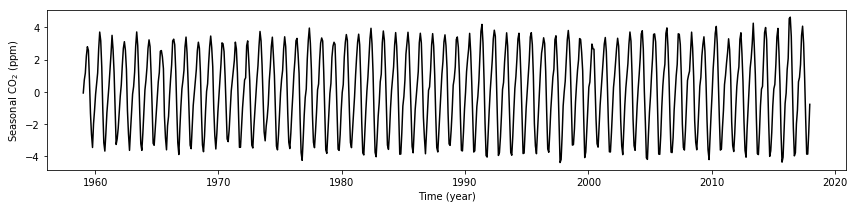

In [23]:
# Get seasonal component
SeasonalCO2 = CO2_f-CO2_filter

# plot the time series
FigWidth = 12.
fig9 = plt.figure(9,figsize=(FigWidth,FigWidth*1./4.))
ax9 = fig9.add_subplot(111)
ax9.plot(DecimalDate_f,SeasonalCO2,'k-',label="Monthly Mean CO$_2$ Data")
plt.xlabel("Time (year)")
plt.ylabel("Seasonal CO$_2$ (ppm)")
plt.tight_layout()
plt.savefig("MaunaLoa_CO2_TimeSeries_Seasonal.png",dpi=600)

We can zoom in a little bit to see the seasonal pattern more clearly.

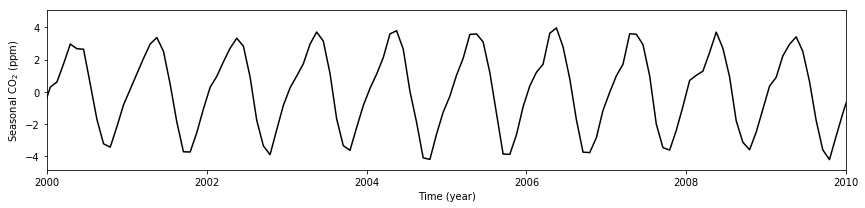

In [24]:
ax9.set_xlim(2000,2010)
fig9.savefig("MaunaLoa_CO2_TimeSeries_Seasonal10.png",dpi=600)
fig9

To model the seasonal signal we will use a harmonic function (e.g. a sine wave). There are other ways we could approach this but this is a simple btu effective approach. The mathematical equation for a sine wave is:

$$
\begin{equation}
{S_t = A\:\sin\:(\:f\:X_t + \phi) + D}
\end{equation}
$$

where $A$ is the amplitude of the wave, $f$ is the wave frequency, $\phi$ is the phase (where in the cycle of one wavelength the signal starts), and $D$ is the offset. 

We can fit a seasonal signal to the decomposed data by fitting a sine wave of this form to the data using a least squares optimisation function (i.e. minimising the square of our residuals).

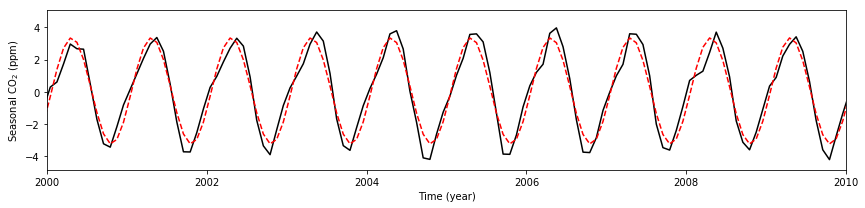

In [25]:
#import optimisation routine for fitting sine curve to the data
from scipy.optimize import leastsq

# create a sine wave function for optimising to our seasonal data
# minimising the difference to the data
optimize_func = lambda x: x[0]*np.sin(x[1]*DecimalDate_f+x[2]) + x[3] - SeasonalCO2

# take an initial guess at the parameters
guess_mean = np.mean(SeasonalCO2)
guess_phase = 1.6
guess_freq = 6.3
guess_amp = 3.

# run the least squared analysis to optimise
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
sine_fit = est_amp*np.sin(est_freq*DecimalDate_f+est_phase) + est_mean

ax9.plot(DecimalDate_f,sine_fit,'r--')
fig9.savefig("MaunaLoa_CO2_TimeSeries_Fit.png",dpi=600)
fig9

### Random component / residuals

The remaining difference (residuals) between the decomposed seasonal data and the sine wave model fit through it is the last component of our timeseries. This may still contain some signal which could be further decomposed if desired.

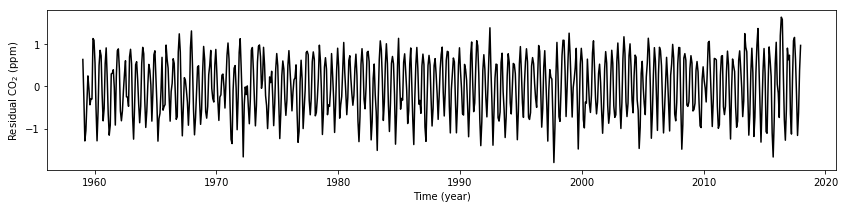

In [26]:
# get residuals from seasonal signal
Residuals = SeasonalCO2 - sine_fit

# plot residuals
fig10 = plt.figure(9,figsize=(FigWidth,FigWidth*1./4.))
ax10 = fig10.add_subplot(111)
ax10.plot(DecimalDate_f,Residuals,'k-',label="Monthly Mean CO$_2$ Data")
plt.xlabel("Time (year)")
plt.ylabel("Residual CO$_2$ (ppm)")
plt.tight_layout()
plt.savefig("MaunaLoa_CO2_TimeSeries_Residuals.png",dpi=600)

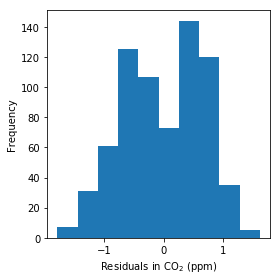

In [27]:
# plot the residuals
fig11 = plt.figure(10,figsize=(4,4))
ax11 = fig11.add_subplot(111)
ax11.hist(Residuals)
plt.xlabel("Residuals in CO$_2$ (ppm)")
plt.ylabel("Frequency")
#plt.xlim(-10,10)
plt.tight_layout()
fig11.savefig("MaunaLoa_CO2_TimeSeries_Final_Residuals_Hist.png", dpi=600)

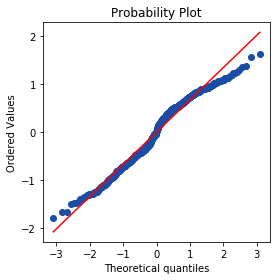

In [28]:
# create a second plot axis for normal probability plot 
fig12 = plt.figure(1,figsize=(4,4))
ax12 = fig12.add_subplot(111)
stat.probplot(Residuals,plot=ax12)

# customise the colours
ax12.get_lines()[0].set_marker('o')
ax12.get_lines()[0].set_markerfacecolor([0.1,0.3,0.65])
ax12.get_lines()[0].set_markeredgecolor([0.1,0.3,0.65])
plt.tight_layout()
fig12.savefig("MaunaLoa_CO2_TimeSeries_Final_ProbPlot.png", dpi=600)

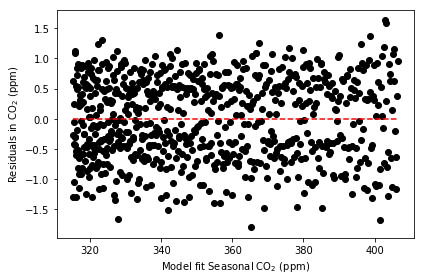

In [29]:
# create a third plot for model vs residuals
Model = fit(DecimalDate_f)
fig12 = plt.figure(12,figsize=(6,4))
ax12 = fig12.add_subplot(111)
ax12.plot(Model,Residuals,'ko')
ax12.plot([Model.min(),Model.max()],[0,0],'r--')
plt.xlabel("Model fit Seasonal CO$_2$ (ppm)")
plt.ylabel("Residuals in CO$_2$ (ppm)")
plt.tight_layout()
fig12.savefig("MaunaLoa_CO2_TimeSeries_Final_Resis.png", dpi=600)

### Final decomposition

So now we have our final decomposition, let's plot the results all together.

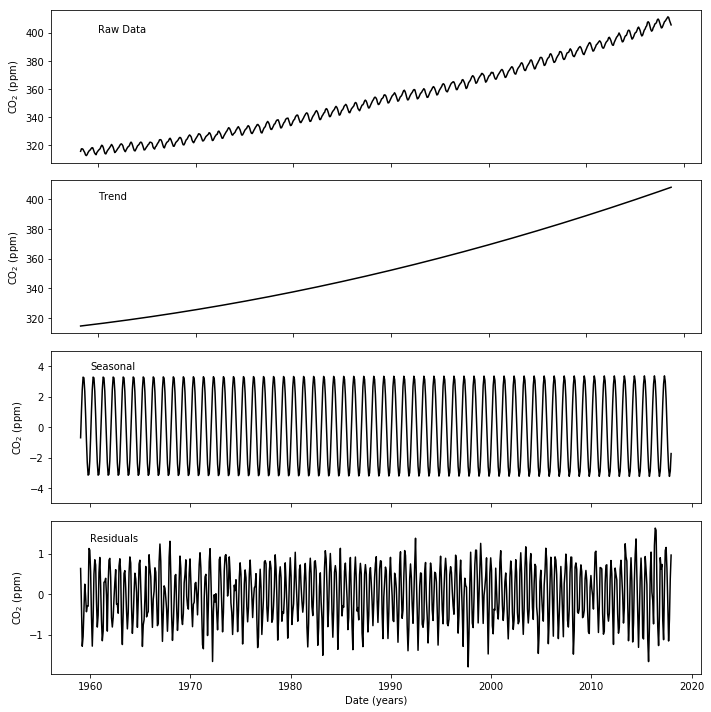

In [30]:
# Create decomposition plot
FigWidth=10
fig10 = plt.figure(10,figsize=(FigWidth,FigWidth))

# plot data
ax10a = fig10.add_subplot(411)
ax10a.plot(DecimalDate,CO2,'k-')
ax10a.set_ylabel("CO$_2$ (ppm)")
ax10a.xaxis.set_ticklabels([])
plt.text(1960,400,"Raw Data")

#plot trend
ax10b = fig10.add_subplot(412)
ax10b.plot(DecimalDate,fit(DecimalDate),'k-')
ax10b.set_ylabel("CO$_2$ (ppm)")
ax10b.xaxis.set_ticklabels([])
plt.text(1960,400,"Trend")

#plot seasonal
ax10c = fig10.add_subplot(413)
ax10c.plot(DecimalDate_f,sine_fit,'k-')
ax10c.set_ylabel("CO$_2$ (ppm)")
ax10c.xaxis.set_ticklabels([])
ax10c.set_ylim(-5,5)
plt.text(1960,3.8,"Seasonal")

#plot noise
ax10d = fig10.add_subplot(414)
ax10d.plot(DecimalDate_f,Residuals,'k-')
ax10d.set_ylabel("CO$_2$ (ppm)")
plt.text(1960,1.3,"Residuals")
plt.xlabel("Date (years)")

plt.tight_layout()
plt.savefig("MaunaLoa_CO2_TimeSeries_Decomposition.png",dpi=600)

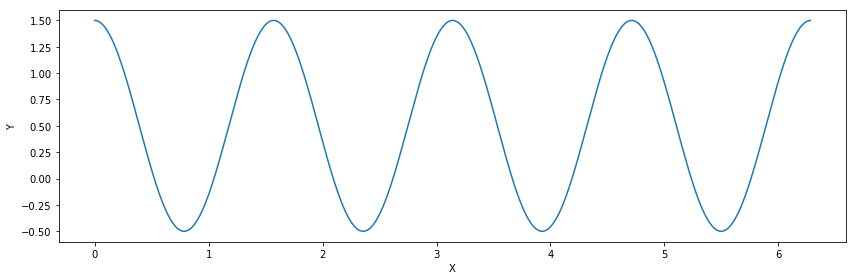

In [31]:
# recreate the fitted curve using the optimized parameters
X = np.arange(0,2*np.pi,0.01)
sine_wave = 1.*np.sin(4.*X+np.pi/2) + 0.5
plt.figure(11,figsize=(12,4))
plt.plot(X,sine_wave)
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.savefig("sinewave.png",dpi=600)

In [32]:
Time = np.arange(1957,2100,0.1)

Prediction = coefs[2]+ coefs[1]*Time+coefs[0]*Time**2. + est_amp*np.sin(est_freq*Time+est_phase) + est_mean

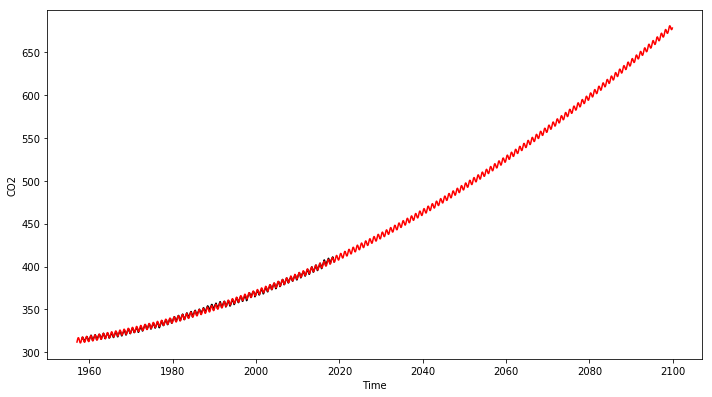

In [33]:
FigWidth = 10.
fig99 = plt.figure(99,figsize=(FigWidth,FigWidth*9./16.))
ax99 = fig99.add_subplot(111)
ax99.plot(DecimalDate,CO2,'k-',label="Mean Monthly CO$_2$")
ax99.plot(Time,Prediction,'r-',label="Predicted CO$_2$")
plt.xlabel("Time")
plt.ylabel("CO2")
plt.tight_layout()
plt.savefig("prediction.png",dpi=600)